# Red Neuronal desde 0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

## Making dataset using Gaussian Distribution Bi dimensional

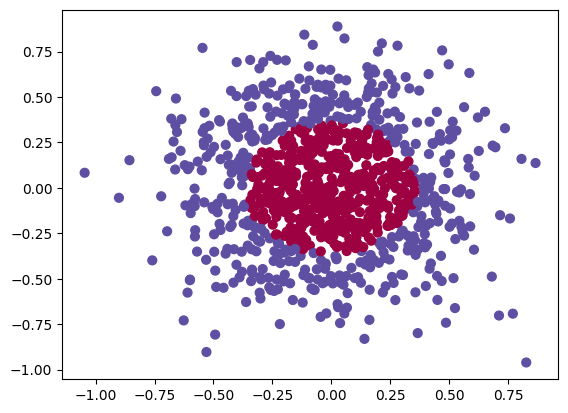

In [6]:
N = 1000
# generate dataset:
#   n_features is used to define the number of dimensions of the data
#   n_classes is used to define the number of classes
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Building Net Structure

In [7]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        # W will store the weights and b will store the bias
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    # return the structure initialized
    return parameters

## Define activation and error functions

In [8]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)
    
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

## Training function

In [11]:
def train(X_data,lr,params,training=True):
## Forward

    # Defining Layer 0 as input layer then A0 is the input
    params['A0'] = X_data
    
    # Operation input by the first layer dot weight and add bias
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    # Operation input by the second layer dot weight and add bias
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    # Operation input by the third layer dot weight and add bias
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
    
    # Return the output
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

## Training the network

In [16]:
layer_dims =[2, 6, 8, 1]
params = initialize_parameters_deep(layer_dims)

In [17]:
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 250 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))
        

0.3231247542340711
0.12992228379338747
0.033623405597558775
0.023844331097771537
0.018554573569665844
0.015132598195357895
0.013058943453359173
0.011521769771421376
0.010488174056129777
0.009817713265526034
0.009316215932287182
0.008916825144876309
0.00858662219159237
0.00820552889482844
0.007808057141176027
0.007492685695358944
0.007244799039475833
0.007027677314951592
0.0068340304622436536
0.006659646391026241
0.006500630091189858
0.006354223929645803
0.006219000869879686
0.006093294089778312
0.005975299583150393
0.005865505697827798
0.005762344467796731
0.005665085091041355
0.005573235190926628
0.005488246654004007
0.005406843355908181
0.005329109830887826
0.005255667210410783
0.005186465436156954
0.00512114422805204
0.005059509242340658
0.004844661186151372
0.004728882038284077
0.004627147068544999
0.004530592343449718
0.004438596383486623
0.004351160611677592
0.004268137636585322
0.004189439159859276
0.004115189833074279
0.0040450371296442515
0.003978747812721003
0.003916118004101

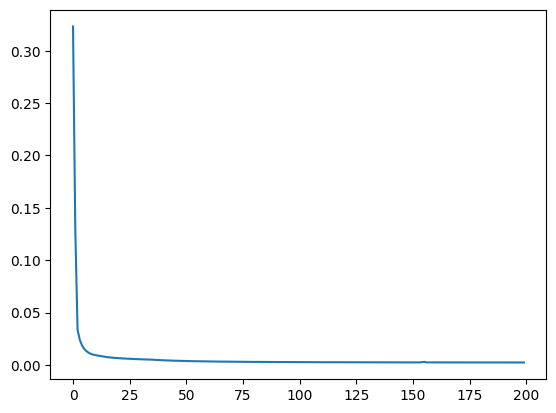

In [18]:
plt.plot(errors)

## Testing the net

In [20]:
# Generante random test data
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)
# Painting the result
y = np.where(y >= 0.5, 1, 0)

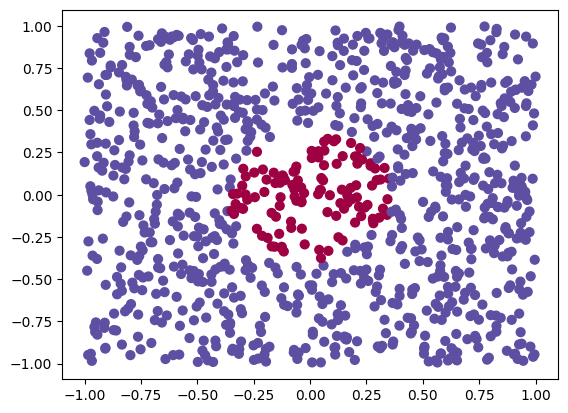

In [21]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);